<a href="https://colab.research.google.com/github/Shweta181/Hackageek-Link-Shield/blob/main/Model_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing basic packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Loading the data
data0 = pd.read_csv('urldata.csv')
data0.head()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,Prefix/Suffix,TinyURL,iFrame,Mouse_Over,Right_Click,Web_Forwards,Labels
0,1,0,1,1,1,0,1,0,1,0,0,1,0
1,1,0,1,1,1,0,1,0,1,0,0,1,0
2,1,0,1,1,1,0,1,0,0,0,0,1,0
3,1,0,1,3,0,0,1,0,0,0,0,0,0
4,1,0,1,3,1,0,1,0,0,0,0,0,0


In [ ]:
#Checking the shape of the dataset
data0.shape

(20, 13)

In [ ]:
#Listing the features of the dataset
data0.columns

Index(['Have_IP', 'Have_At', 'URL_Length', 'URL_Depth', 'Redirection',
       'https_Domain', 'Prefix/Suffix', 'TinyURL', 'iFrame', 'Mouse_Over',
       'Right_Click', 'Web_Forwards', 'Labels'],
      dtype='object')

In [ ]:
#Information about the dataset
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Have_IP        20 non-null     int64
 1   Have_At        20 non-null     int64
 2   URL_Length     20 non-null     int64
 3   URL_Depth      20 non-null     int64
 4   Redirection    20 non-null     int64
 5   https_Domain   20 non-null     int64
 6   Prefix/Suffix  20 non-null     int64
 7   TinyURL        20 non-null     int64
 8   iFrame         20 non-null     int64
 9   Mouse_Over     20 non-null     int64
 10  Right_Click    20 non-null     int64
 11  Web_Forwards   20 non-null     int64
 12  Labels         20 non-null     int64
dtypes: int64(13)
memory usage: 2.2 KB


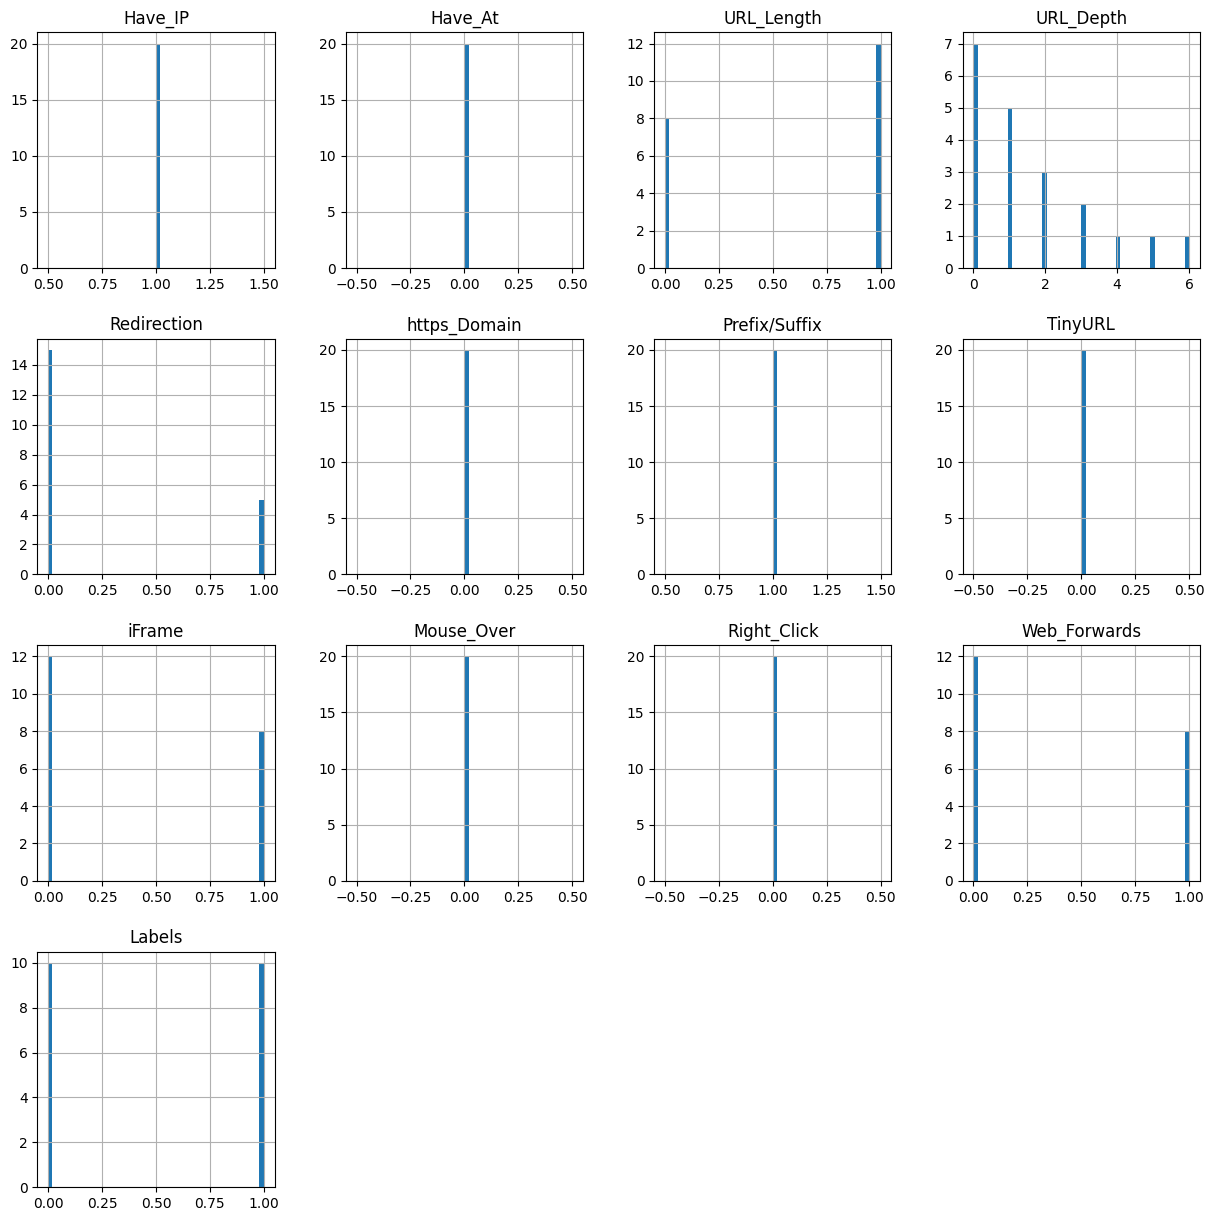

In [ ]:
#Plotting the data distribution
data0.hist(bins = 50,figsize = (15,15))
plt.show()

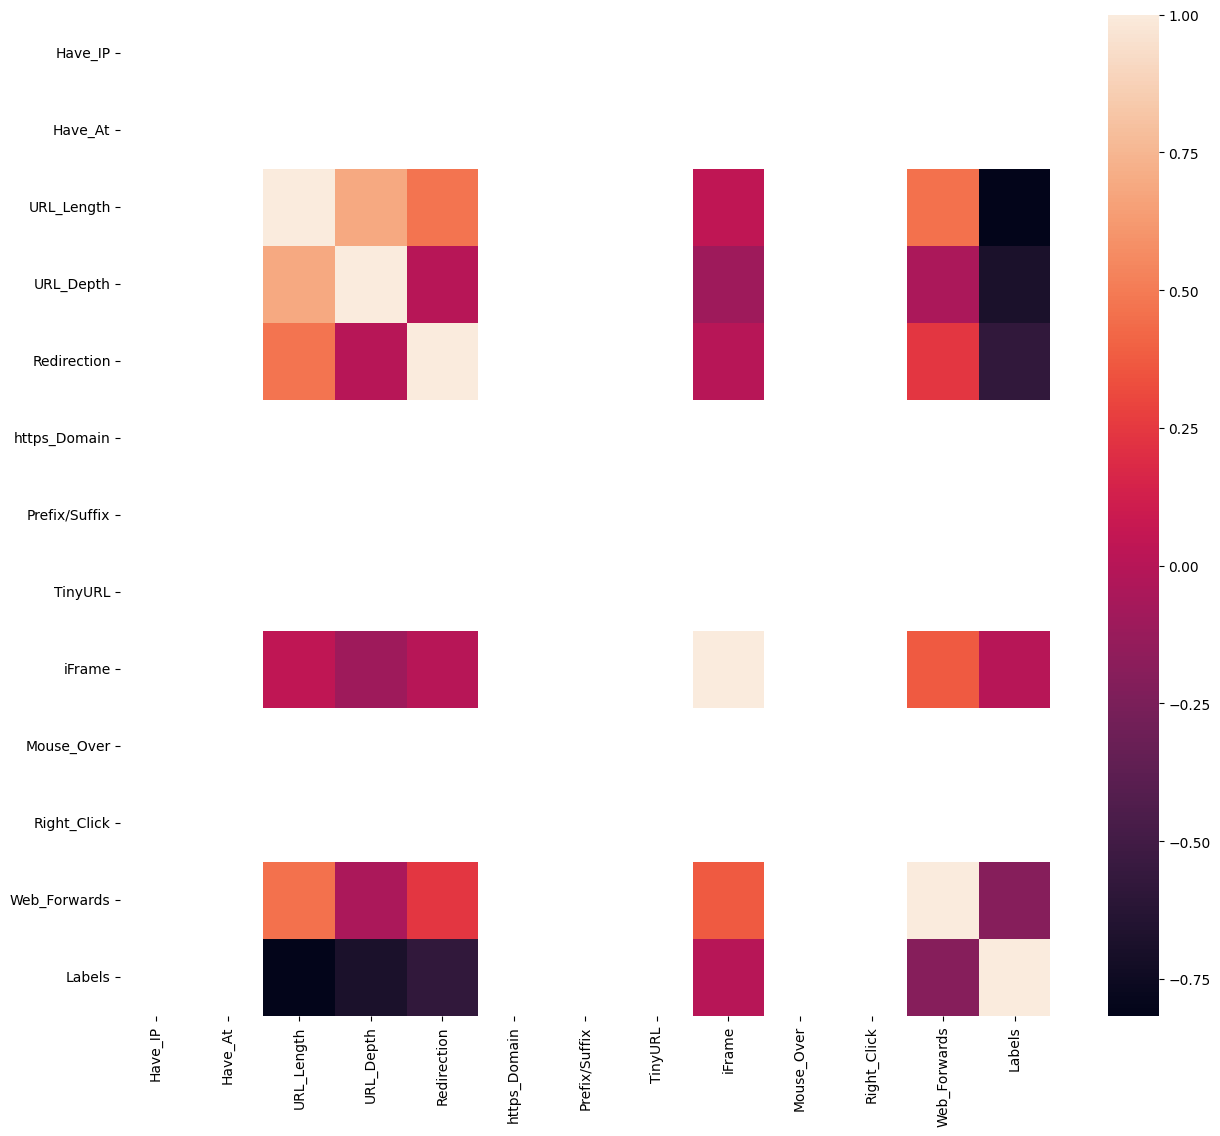

In [ ]:
#Correlation heatmap

plt.figure(figsize=(15,13))
sns.heatmap(data0.corr())
plt.show()

In [ ]:
data0.describe()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,Prefix/Suffix,TinyURL,iFrame,Mouse_Over,Right_Click,Web_Forwards,Labels
count,20.0,20.0,20.000000,20.000000,20.000000,20.0,20.0,20.0,20.000000,20.0,20.0,20.000000,20.000000
mean,1.0,0.0,0.600000,1.600000,0.250000,0.0,1.0,0.0,0.400000,0.0,0.0,0.400000,0.500000
std,0.0,0.0,0.502625,1.788854,0.444262,0.0,0.0,0.0,0.502625,0.0,0.0,0.502625,0.512989
min,1.0,0.0,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
25%,1.0,0.0,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
50%,1.0,0.0,1.000000,1.000000,0.000000,0.0,1.0,0.0,0.000000,0.0,0.0,0.000000,0.500000
75%,1.0,0.0,1.000000,2.250000,0.250000,0.0,1.0,0.0,1.000000,0.0,0.0,1.000000,1.000000
max,1.0,0.0,1.000000,6.000000,1.000000,0.0,1.0,0.0,1.000000,0.0,0.0,1.000000,1.000000


In [ ]:
# shuffling the rows in the dataset so that when splitting the train and test set are equally distributed
data = data0.sample(frac=1).reset_index(drop=True)
data.head()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,Prefix/Suffix,TinyURL,iFrame,Mouse_Over,Right_Click,Web_Forwards,Labels
0,1,0,1,1,0,0,1,0,0,0,0,1,1
1,1,0,1,1,1,0,1,0,1,0,0,1,0
2,1,0,0,0,0,0,1,0,0,0,0,1,1
3,1,0,1,3,1,0,1,0,0,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,0,0,1


In [ ]:
# Sepratating & assigning features and target columns to X & y
y = data['Labels']
X = data.drop('Labels',axis=1)
X.shape, y.shape

((20, 12), (20,))

In [ ]:
# Splitting the dataset into train and test sets: 80-20 split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2, random_state = 12)
X_train.shape, X_test.shape

((16, 12), (4, 12))

We have used XGBooost to train our model

In [ ]:
#XGBoost Classification model
from xgboost import XGBClassifier

# instantiate the model
xgb = XGBClassifier(learning_rate=0.4,max_depth=7)
#fit the model
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.4, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
#predicting the target value from the model for the samples
y_test_xgb = xgb.predict(X_test)
y_train_xgb = xgb.predict(X_train)

In [ ]:
from sklearn.metrics import accuracy_score

#computing the accuracy of the model performance
acc_train_xgb = accuracy_score(y_train,y_train_xgb)
acc_test_xgb = accuracy_score(y_test,y_test_xgb)

print("XGBoost: Accuracy on training Data: {:.3f}".format(acc_train_xgb))
print("XGBoost : Accuracy on test Data: {:.3f}".format(acc_test_xgb))

XGBoost: Accuracy on training Data: 0.812
XGBoost : Accuracy on test Data: 0.750


In [ ]:
# Define the storeResults function if you haven't already
def storeResults(model_name, acc_train, acc_test):
    # Implement the logic to store the results here
    # For example, you could print them, save them to a file, etc.
    print(f"{model_name}: Accuracy on training Data: {acc_train:.3f}")
    print(f"{model_name}: Accuracy on test Data: {acc_test:.3f}")

#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('XGBoost', acc_train_xgb, acc_test_xgb)

XGBoost: Accuracy on training Data: 0.812
XGBoost: Accuracy on test Data: 0.750


In [ ]:
# save XGBoost model to file
import pickle
pickle.dump(xgb, open("XGBoostClassifier.pickle.dat", "wb"))